# Missing Value

- determine the missing value
- examine its structure with visual techniques
- Test randomness
- fill with appropriate methods

Removing missing values direcly from the dataset decreases the reliability of statistical inference and modelling studies.

If missing values are created randomly, you can remove it. However; if it is created with because of problems associated with variables, removing will cause biasness.



**Disadvantages of removing missing data directly:**

- we should know if it is structural or not
- NA does mean missing value every time (it may be 0)
- information loss



**Types of missing value:**

- Completely randomly missing
- Randomly missing
- Not randomly missing



**Randomness test for missing value:**

- Independent 2 samples t test
- Correlation test
- MCAR test of Little



**How to solve missing value problem?**

Deleting methods

- deleting observation or variable
- deleting based on list (Listwise method)
- deleting based on pairs (Pairwise method)

Value assignment methods

- mean, median
- assigning mostly similar unit (hot deck)
- outsource assigning

Predictive methods

- machine learning
- EM
- multiple assigning

## Fast Solution

In [97]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**finding missing value number for each variable and deleting them:**

In [98]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [99]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


it deleted each observation even containing 1 missing value

In [100]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [101]:
dff = df.dropna()

In [102]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

**filling missing values by simple value assigning:**

In [103]:
df["V1"].mean()

6.0

In [104]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [105]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [106]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Detecting missing value:

In [107]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


check dimension:

In [108]:
df.shape

(9, 3)

see summary statistics:

In [109]:
df.describe()

,V1,V2,V3
count,7.0,6.000000,7.00000
mean,6.0,6.166667,11.00000
std,5.0,3.656045,9.72968
min,1.0,2.000000,2.00000
25%,2.0,3.500000,5.50000
50%,6.0,6.000000,7.00000
75%,8.0,7.750000,13.00000
max,15.0,12.000000,31.00000


check data types:

In [110]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

value number of each variable:

In [111]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

missing value number of each variable:

In [112]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

total missing value number in dataset:

In [113]:
df.isnull().sum().sum()

7

variables that has at least one missing value:

In [114]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [115]:
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


variables that has no missing value:

In [116]:
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [117]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Visualization

In [118]:
#!pip install missingno

In [119]:
import missingno as msno

In [120]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


barplot:

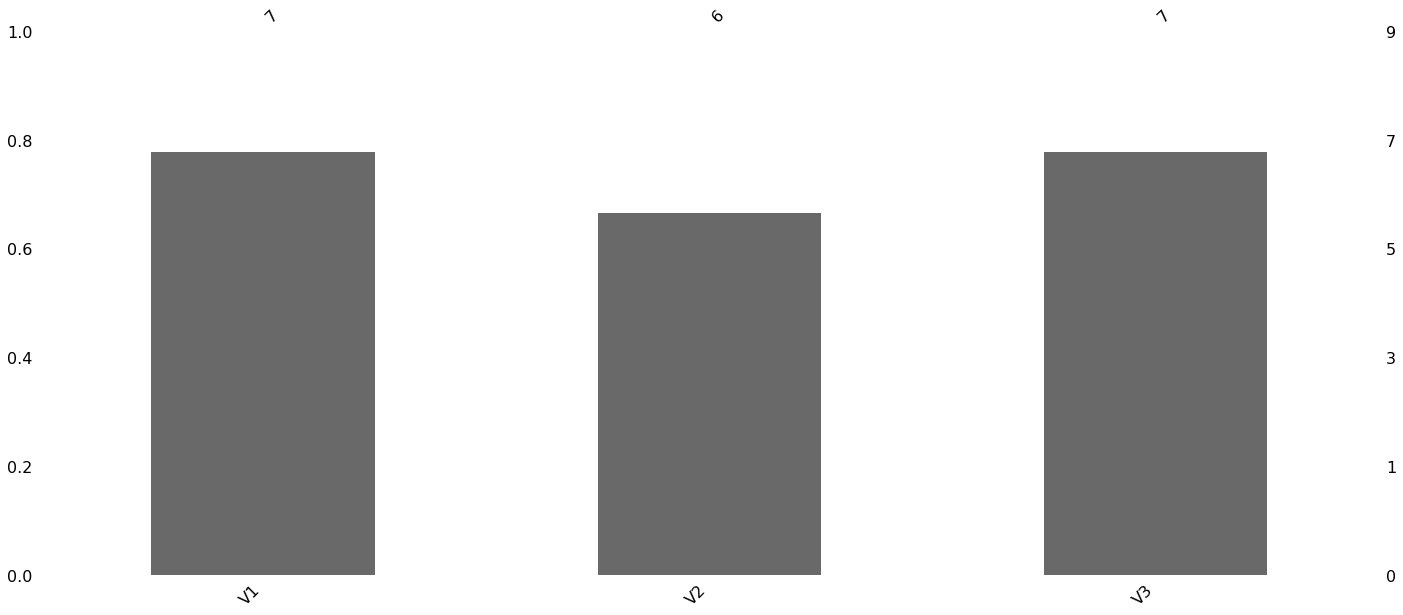

In [121]:
msno.bar(df);

In [122]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

heatmap:

In [123]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


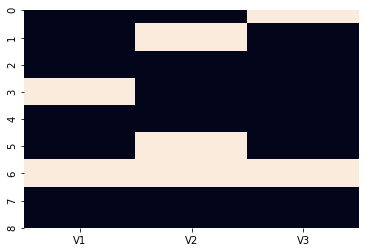

In [124]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

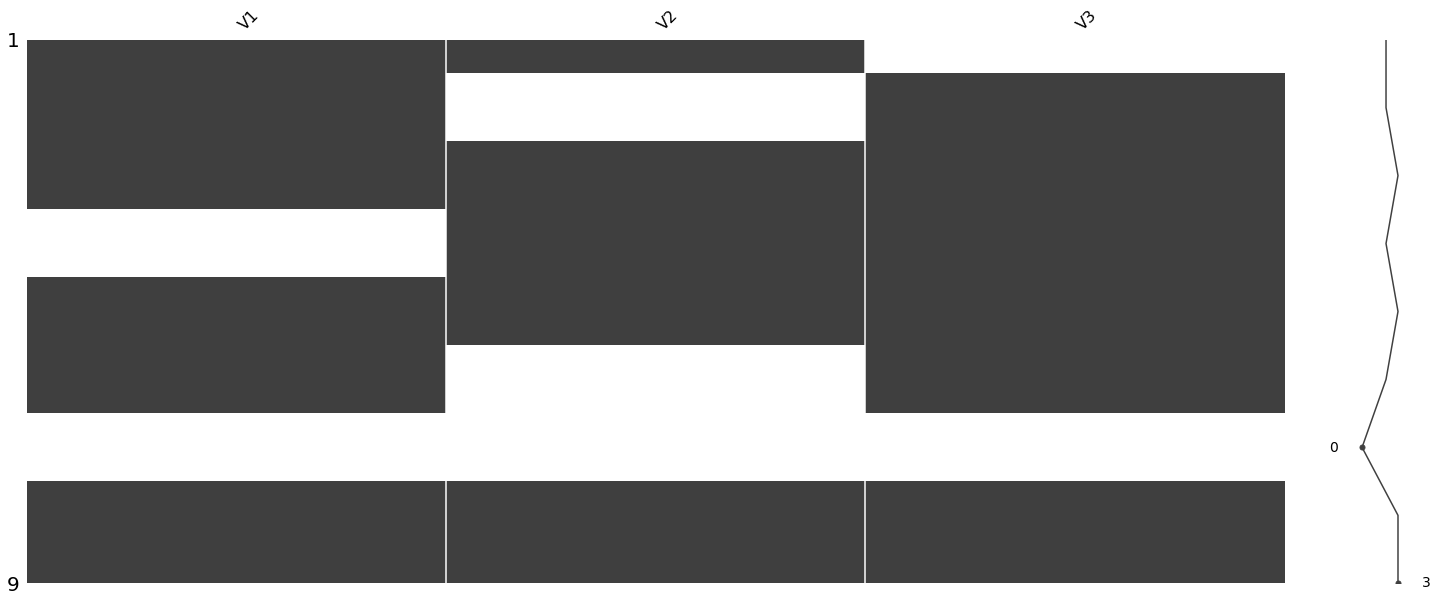

In [125]:
msno.matrix(df)

another example for structural defects:

In [126]:
df = sns.load_dataset("planets").copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


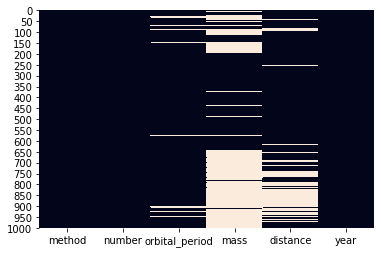

In [127]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

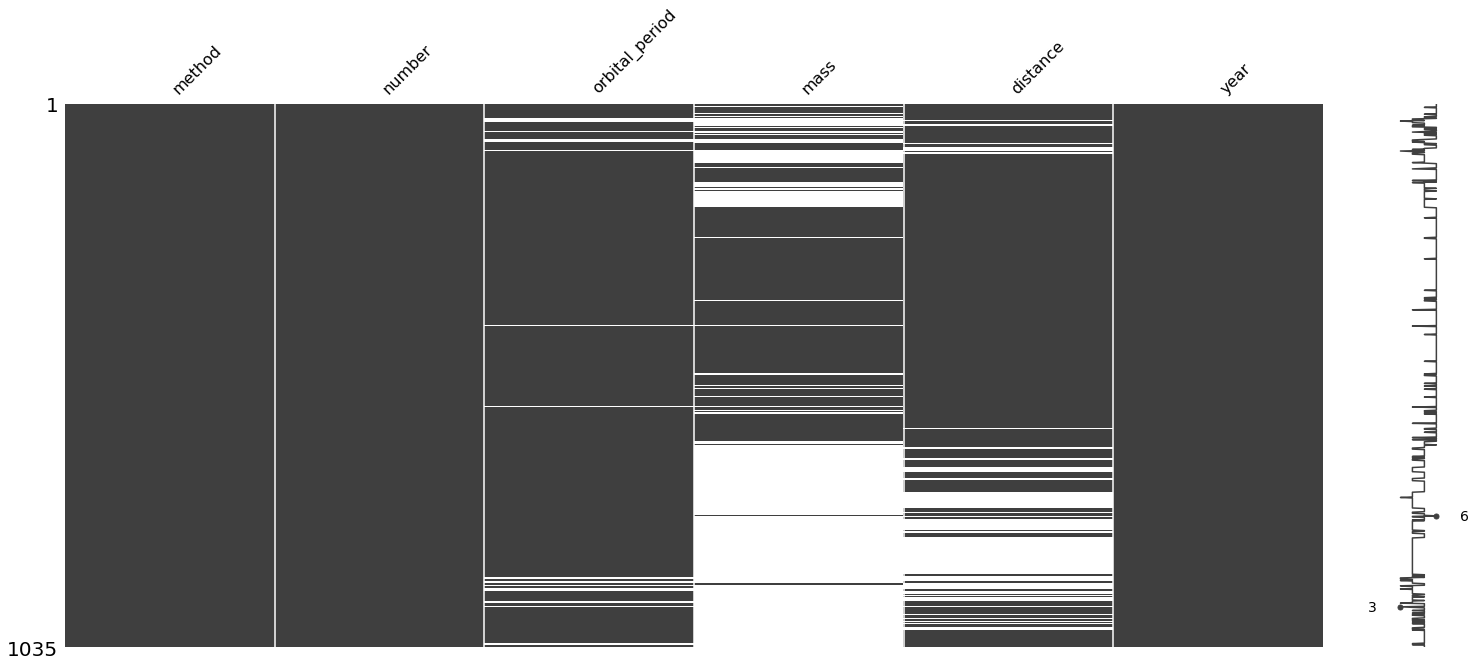

In [128]:
msno.matrix(df);

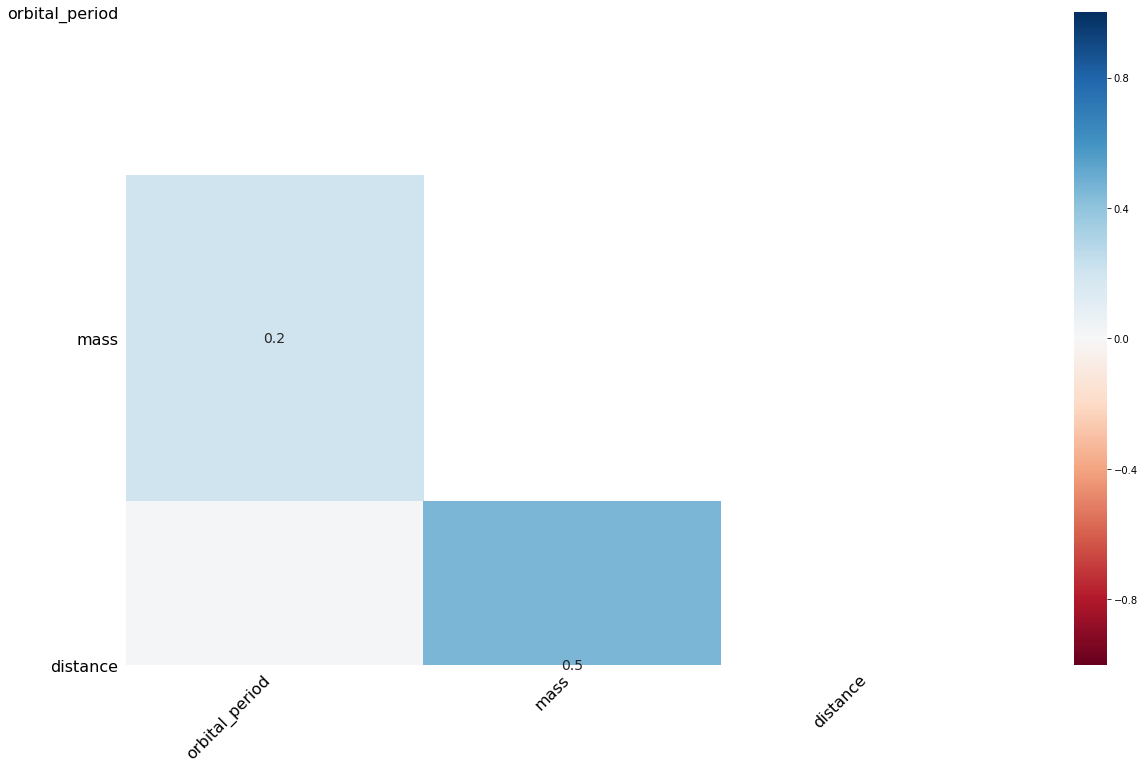

In [129]:
msno.heatmap(df);

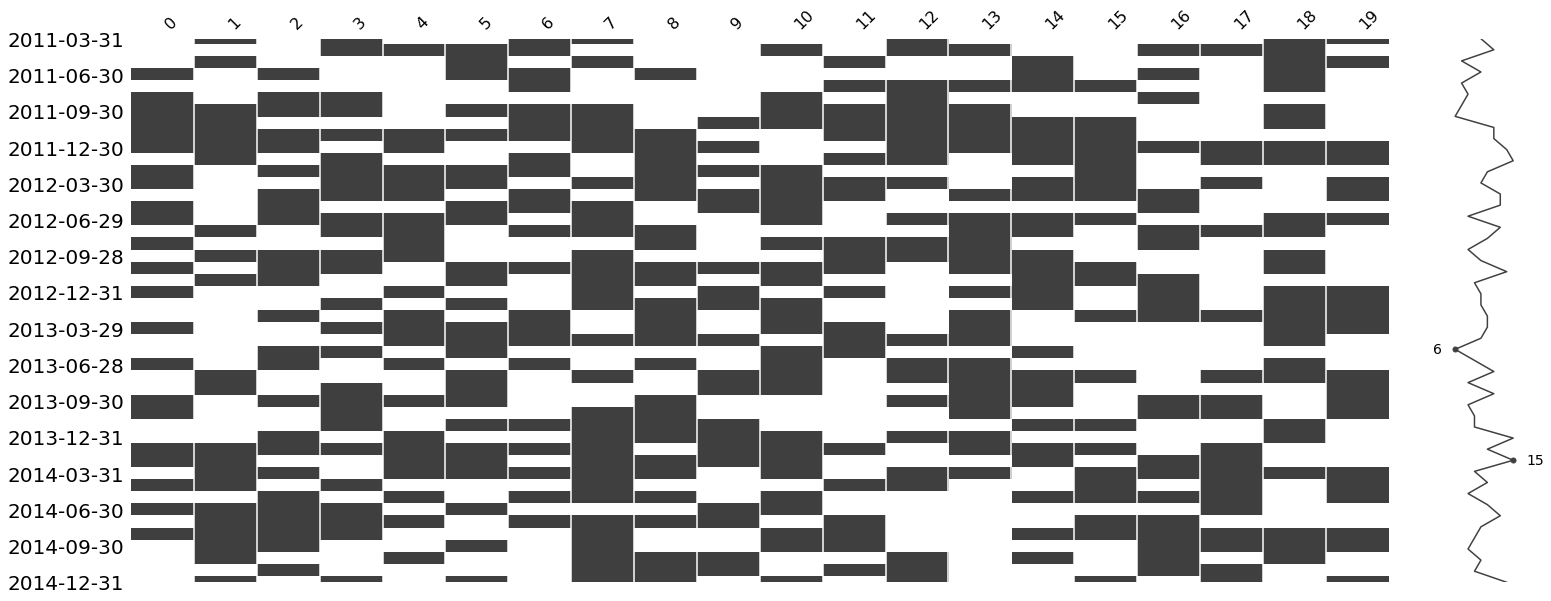

In [130]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Deleting Methods

In [131]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


deleting observations having at least 1 missing value:

In [132]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


deleting observations having all values missing:

In [133]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


deleting variables having at least 1 missing value:

In [134]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [135]:
df["V1"][[3,6]] = 99

In [136]:
df.dropna(axis = 1)

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


deleting variables having all values missing:

In [137]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [138]:
df["del_me"] = np.nan

In [139]:
df

,V1,V2,V3,del_me
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,99.0,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,99.0,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [140]:
df.dropna(axis = 1, how = "all", inplace = True)

In [141]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


inplace = True makes changes (deletion in that case) permanent

## Simple Value Assignment Methods

In [142]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


filling missing values with zero:

In [143]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

filling missing values with mean:

In [144]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

filling all missing values with its own mean:

In [145]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 )

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


second way:

In [146]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


you can check the distribution of each variable and see that some are not normal. In that case, you can fill missing values of these variables with median and other missing values with mean:

In [147]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [148]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [149]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"salary" : V1,
         "V2" : V2,
         "V3" : V3,
        "department" : V4}        
)

df

,salary,V2,V3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [150]:
df.groupby("department")["salary"].mean()

department
IK    4.666667
IT    7.000000
Name: salary, dtype: float64

In [151]:
df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: salary, dtype: float64

## Assignment for Categorical Variables

In [152]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"salary" : V1,
         "V2" : V2,
         "V3" : V3,
        "department" : V4}        
)

df

,salary,V2,V3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [153]:
df.isnull()

,salary,V2,V3,department
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [154]:
df.groupby("department")["department"].count()

department
IK     5
IT     3
nan    1
Name: department, dtype: int64

simple assignment:

In [155]:
df.department.loc[df.department == "nan"] = "IK"

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [156]:
df

,salary,V2,V3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [157]:
df.department[0] = df.V3[0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
df

,salary,V2,V3,department
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [159]:
df.groupby("department")["department"].count()

department
IK    6
IT    2
Name: department, dtype: int64

In [160]:
df.department.fillna(df["department"].mode())

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: department, dtype: object

## Assignment for Time Series

In [161]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"salary" : V1,
         "V2" : V2,
         "V3" : V3,
        "department" : V4}        
)

df

,salary,V2,V3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


filling with the mean of previous and following values:

In [162]:
df["salary"].interpolate()

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: salary, dtype: float64

filling with following value:

In [163]:
df["salary"].fillna(method = "bfill")

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: salary, dtype: float64

## Predictive Assignment Methods

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


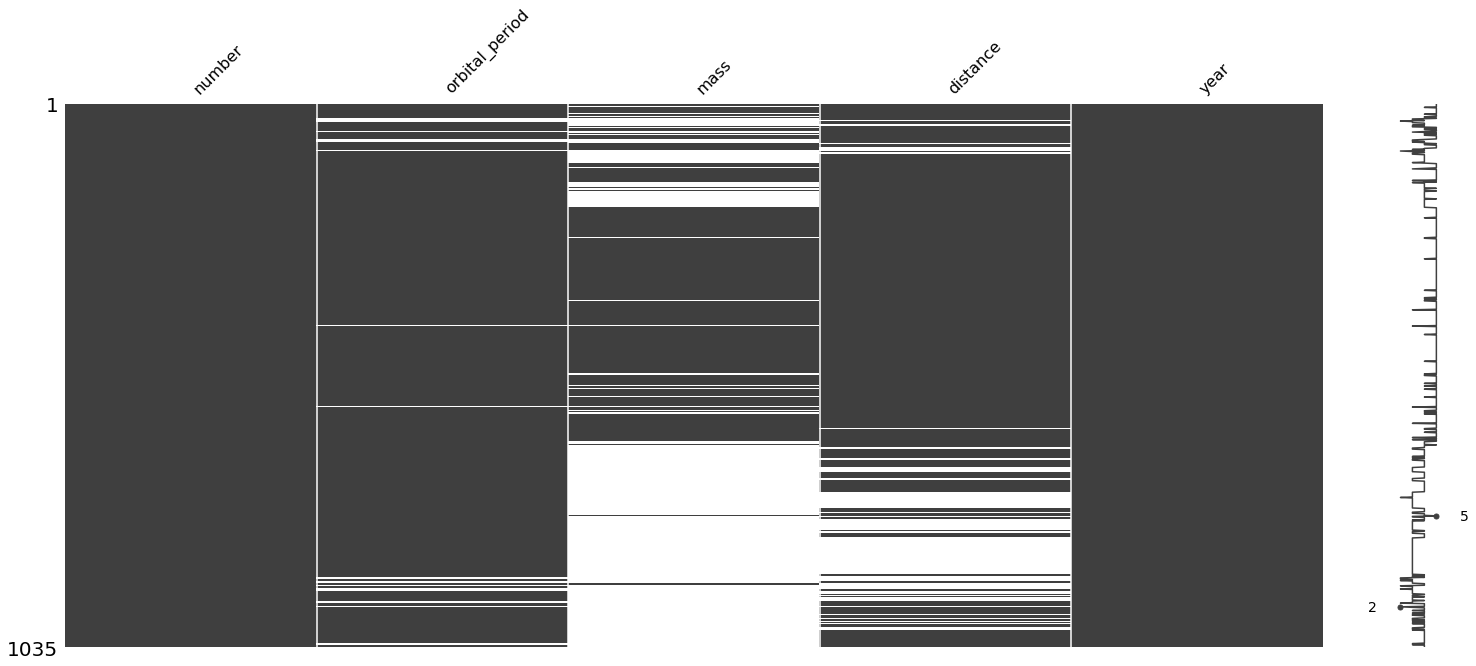

In [164]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

**Assignment with KNN:**

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


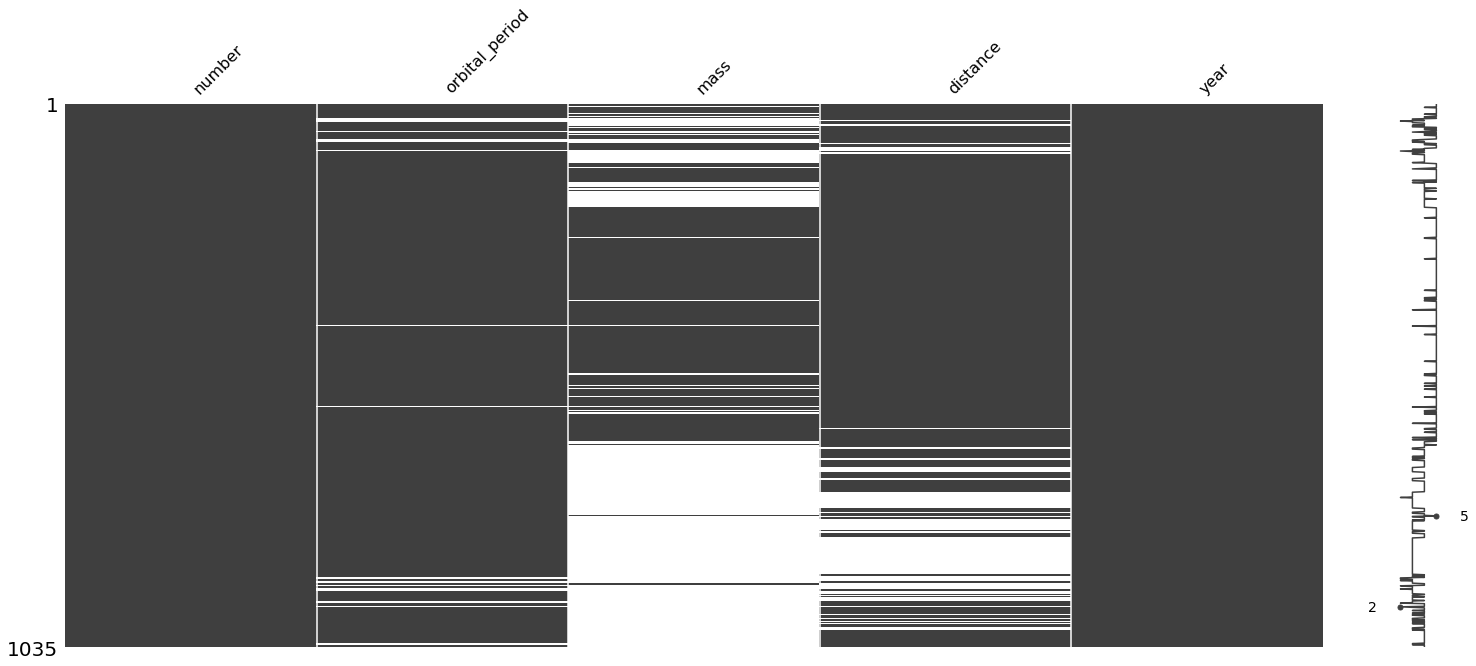

In [170]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [171]:
from ycimpute.imputer import iterforest

In [172]:
var_names = list(df)

In [173]:
n_df = np.array(df)

In [174]:
dff = iterforest.IterImput().complete(n_df)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [175]:
dff = pd.DataFrame(dff, columns = var_names)

In [176]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

**Assignment with EM:**

In [177]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [178]:
from ycimpute.imputer import EM

In [179]:
var_names = list(df)

In [180]:
n_df = np.array(df)

In [181]:
dff = EM().complete(n_df)

In [182]:
dff = pd.DataFrame(dff, columns = var_names)

In [183]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

*How to decide which method to use?*

create artificial missing values in the dataset. fill in there missing values by different methods. check which methods works best.